# Logistic Regression

In this section, we introduce a method to solve the **classification problems**, which is called **Logistic Regression**.<br>
Firstly, we present our dataset $T=\left \{(\boldsymbol{x}_{1},y_{1}),\dots,(\boldsymbol{x}_{n},y_{n}) \right\}$. Here, we have $n$ samples, each of which is a pair of data $\boldsymbol{x}_{i}$ and label $y_{i}$.<br>
Further, we define the logistic function which we will use later:
$$
\sigma(x)=\frac{1}{1+e^{-x}}
$$
The curve of the function is plotted below.

It's not difficult to tell that:
- $\sigma : \mathbb{R} \rightarrow (-1,1)$
- $\sigma(0)=0.5 $
- $\sigma^{'}(x)=\sigma(x)(1-\sigma(x))$

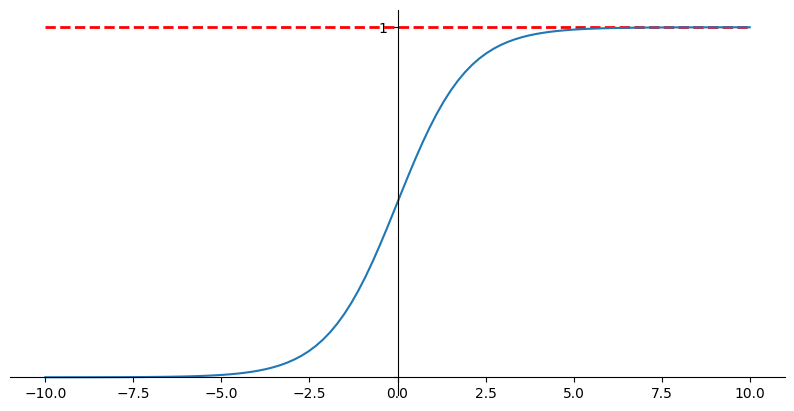

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def sigma(x):
    return 1/(1+np.exp(-x))
x = np.linspace(-10,10,100)
y1 = np.ones_like(x)
plt.figure(figsize=(10,5))
new_ticks=np.linspace(-5,5,11)
plt.yticks(new_ticks)
plt.plot(x,y1,'--',lw=2,color='red')
# gca表示get current axes获得当前实例对象，个人觉得有点像java中的this
ax=plt.gca()
#隐藏右边和上边的边框
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

#ax获得x轴，并将x轴与y中的0对齐
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
#ax获得y轴，并将y轴与x中的0对齐
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

#隐藏掉y轴的0坐标，不然和x轴重了，不好看，0位于从下到上第6个
yticks = ax.yaxis.get_major_ticks()
yticks[5].label1.set_visible(False)
plt.plot(x,sigma(x))


For simplicity, the classification problem is limited to binary, meaning that labels $y_{i} = \pm 1$. We define a $f(\boldsymbol{x})=w_{1}x_{1}+\dots+w_{d}x_{d}=\boldsymbol{w}^{T}\boldsymbol{x}$,<br>
and our linear model can be represented as :
$$ P(y_{i}=1|\boldsymbol{x}_{i})= \sigma(f(\boldsymbol{x}_{i}))=\frac{1}{1+e^{-\boldsymbol{w}^{T}\boldsymbol{x}_{i}}} $$ 
$$ P(y_{i}=-1|\boldsymbol{x}_{i})= 1-\sigma(f(\boldsymbol{x}_{i}))=\frac{1}{1+e^{\boldsymbol{w}^{T}\boldsymbol{x}_{i}}} $$
or more compactly:
$$ P(y_{i}|\boldsymbol{x}_{i})=\sigma(y_{i}\boldsymbol{w}^{T}\boldsymbol{x}_{i}) $$

Now we can define the likelihood function:
$$ L(\boldsymbol{w})=\prod_{i=1}^{n}P(y_{i}|\boldsymbol{x}_{i})=\prod_{i=1}^{n}\sigma(y_{i}\boldsymbol{w}^{T}\boldsymbol{x}_{i}) $$
and the Negative log-likelihood function:
$$ NLL(\boldsymbol{w})=-log(\prod_{i=1}^{n}P(y_{i}|\boldsymbol{x}_{i}))=-\sum_{i=1}^{n}\log P(y_{i}|\boldsymbol{x}_{i})=-\sum_{i=1}^{n}\log \sigma(y_{i}\boldsymbol{w}^{T}\boldsymbol{x}_{i}) $$
To maximize the liklihood funcition $L$ is equivalent to minimizing the negative log-likelihood function $NLL$. <br>
So the optimal parameter $\hat{\boldsymbol{w}}$ can be obtained by solving the following optimization problem:
$$ \hat{\boldsymbol{w}}=\min_{\boldsymbol{w}} NLL(\boldsymbol{w})=-\sum_{i=1}^{n}\log \sigma(y_{i}\boldsymbol{w}^{T}\boldsymbol{x}_{i}) $$
Again, we can use the gradient descent method to solve the optimization problem. The gradient of $NLL$ is:
$$ \nabla NLL(\boldsymbol{w})=-\sum_{i=1}^{n}(1-\sigma(y_{i}\boldsymbol{w}^{T}\boldsymbol{x}_{i}))y_{i}\boldsymbol{x}_{i} $$

## Code example
Here, we do a simple experiment to show how to use logistic regression to solve a classification problem. <br>
We use create the dataset by set the number of samples $n=1000$, and the dimension of the data $m=3$. <br>
The labels are defined as 
$$ y_{i}=\left \{\begin{matrix}
 1, x_{i1}+x_{i2}+x_{i3}>0
\\ -1, x_{i1}+x_{i2}+x_{i3}\leq 0
\end{matrix} \right.  $$
And we generate $\boldsymbol{x}_{i}$ by sampling from uniform distribution $x_{i1},x_{i2},x_{i3} \sim U(-1,1)$.

In [34]:
import numpy as np
import os
def create_folder(folder_path):
    if not os.path.exists(folder_path):
        # 如果文件夹不存在，则创建它
        os.makedirs(folder_path)
        print("文件夹已创建")
    else:
        print("文件夹已存在，不需要创建")

In [35]:
create_folder('./data/')

文件夹已存在，不需要创建


In [46]:
import matplotlib.pyplot as plt
feature_dim = 3
train_n = 1000
X_train = np.load('./data/X_train.npy')
#X_train = 2*(np.random.rand(train_n,feature_dim)-0.5)#m*d
w_real = np.array([[1], [1],[1]])
Y = np.where(np.dot(X_train, w_real) > 0, 1, -1)
X_train.shape, Y.shape, w_real.shape

((1000, 3), (1000, 1), (3, 1))

In [47]:
# a rnadom intial value of w
w = np.random.rand(feature_dim,1)
m=X_train.shape[0]

In [48]:
def w_gradient(X,Y,w):
    m = X.shape[0]
    return (-np.sum((Y-sigma(Y*np.dot(X,w)))*X,axis=0)).reshape(-1,1)

In [49]:
def predict(X,w):
    return sigma(np.dot(X,w))

In [50]:
accuracy = []
predict_error = []
def GD(X,Y,w,eta,maxstep=10000):
    cnt = 0
    P = np.where(Y==1,1,0)
    while True:
        w = w - eta*w_gradient(X_train,Y,w)
        if cnt>maxstep:
            return w
        probability = predict(X_train,w)
        predicted_Y = np.where(probability>0.5,1,-1)
        #if cnt%100==0:
        #    print(w)
        if np.linalg.norm(P-predict(X_train,w))<0.1:
            return w
        if cnt%100==0:
            print( f'predict error: {np.linalg.norm(P-predict(X_train,w))} in {cnt} steps'  )
            print(f'predict accuracy: {np.sum(predicted_Y==Y)/train_n} in {cnt} steps')
            predict_error.append(np.linalg.norm(P-predict(X_train,w)))
            accuracy.append(np.sum(predicted_Y==Y)/train_n)
        cnt+=1

In [ ]:
w = np.random.rand(feature_dim,1)
w = GD(X_train,Y,w,eta=0.0001)

We plot the prediction result as follows: the blue points are the data with label $y_{i}=1$, and the red points are the data with label $y_{i}=-1$. And the ordinate shows the probablity of {the i-th data with label $y_{i}=1$} predicted by logistic model. Ideally, the blue points should be close to 1, and the red points should be close to 0.

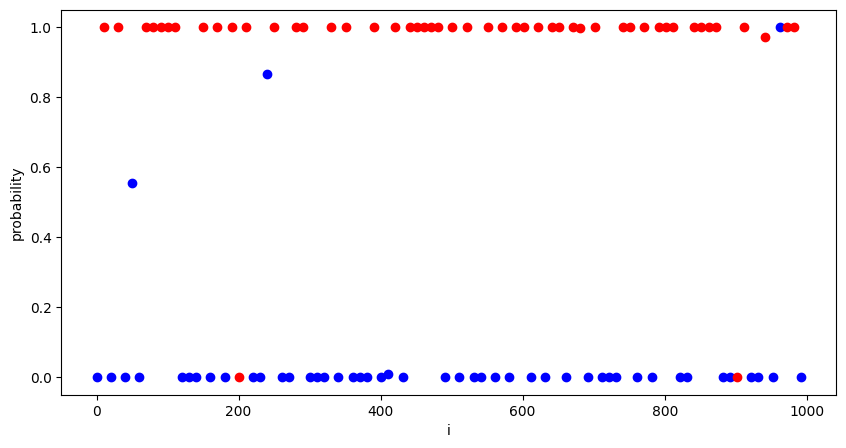

In [52]:
xx = np.linspace(0,1001,1000)
probability = predict(X_train,w)
plt.figure(figsize=(10,5))
plt.xlabel('i')
plt.ylabel('probability')
for i in range(1000):
    if i%10==0:
        if X_train[i][0]+X_train[i][1]+X_train[i][2]>0:
            plt.scatter(xx[i],probability[i],c='r')
        else:
            plt.scatter(xx[i],probability[i],c='b')

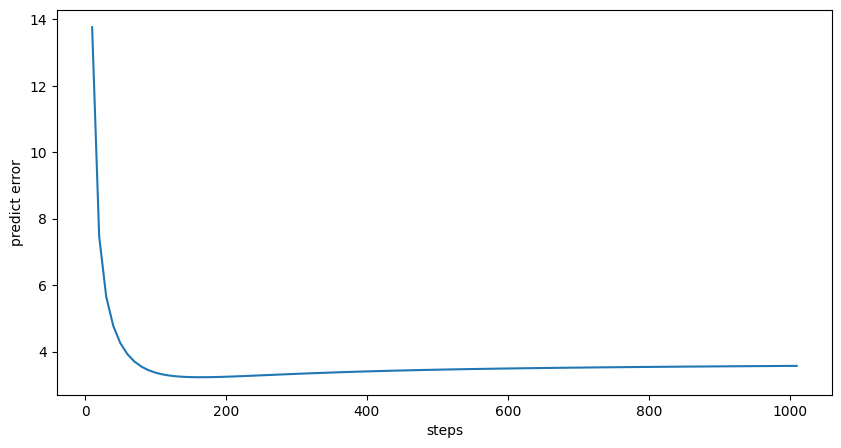

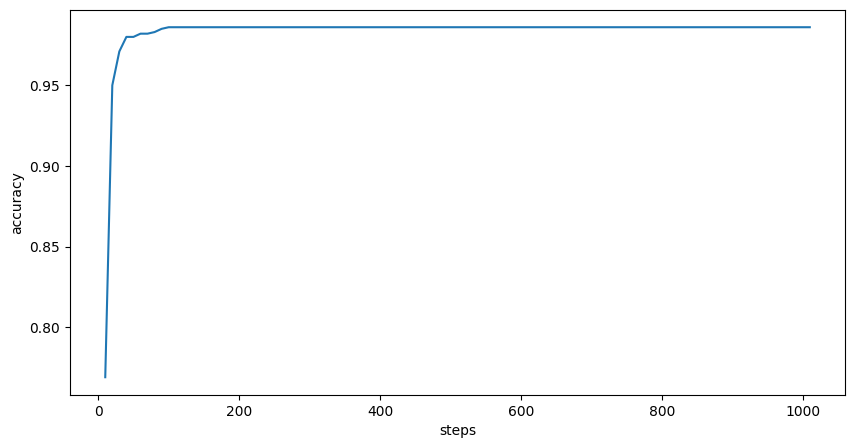

In [53]:
length = len(predict_error)
plt.figure(figsize=(10,5))
plt.xlabel('steps')
plt.ylabel('predict error')
plt.plot(np.arange(1,length+1)*10,np.array(predict_error))
plt.figure(figsize=(10,5))
plt.xlabel('steps')
plt.ylabel('accuracy')
plt.plot(np.arange(1,length+1)*10,accuracy)

In [54]:
print(w)

[[249.7959731 ]
 [243.18264277]
 [263.59893974]]


It's quite obvious that a "good" $w$ is $\boldsymbol{w}=[c,c,c]^{T}, c \rightarrow +\infty $. So from the result we can see that the logistic regression model can fit the data well. But what is I set the condition not linearly separable? Next I will change the condition to:
$$ y_{i}=\left \{\begin{matrix}
 1, x_{i1}\cdot x_{i2}+x^{2}_{i3}>0
\\ -1, x_{i1}\cdot x_{i2}+x^{2}_{i3}\leq 0
\end{matrix} \right.  $$
Let's see the result. 

In [65]:
X_train = np.load('./data/X_train.npy')
Y = X_train[:,0]*X_train[:,1]+X_train[:,2]**2
Y = np.where(Y>0,1,-1).reshape(-1,1)
# a rnadom intial value of w
w = np.random.rand(feature_dim,1)
m=X_train.shape[0]

In [ ]:
w = np.random.rand(feature_dim,1)
predict_error = []
accuracy = []
w = GD(X_train,Y,w,eta=0.0001,maxstep=100000)

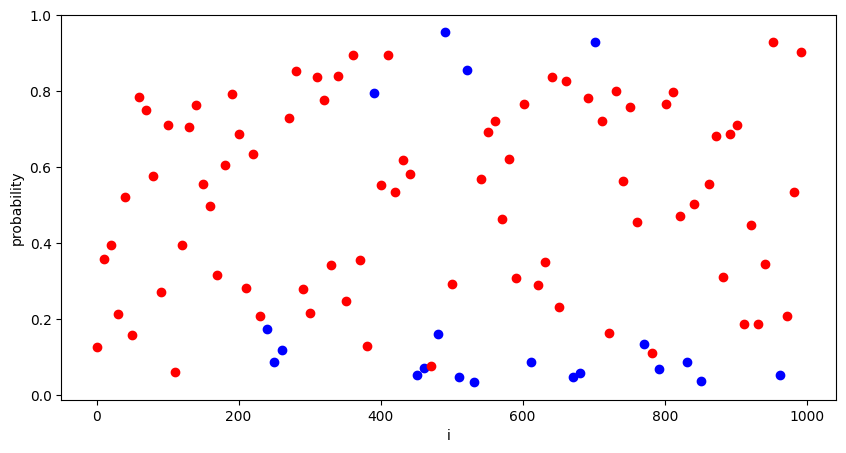

In [82]:
xx = np.linspace(0,1001,1000)
probability = predict(X_train,w)
plt.figure(figsize=(10,5))
plt.xlabel('i')
plt.ylabel('probability')
for i in range(1000):
    if i%10==0:
        if X_train[i][0]*X_train[i][1]+X_train[i][2]**2>0:
            plt.scatter(xx[i],probability[i],c='r')
        else:
            plt.scatter(xx[i],probability[i],c='b')

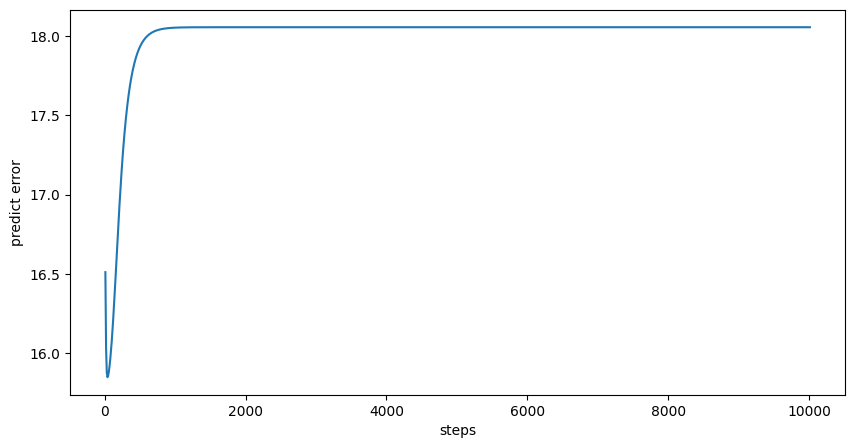

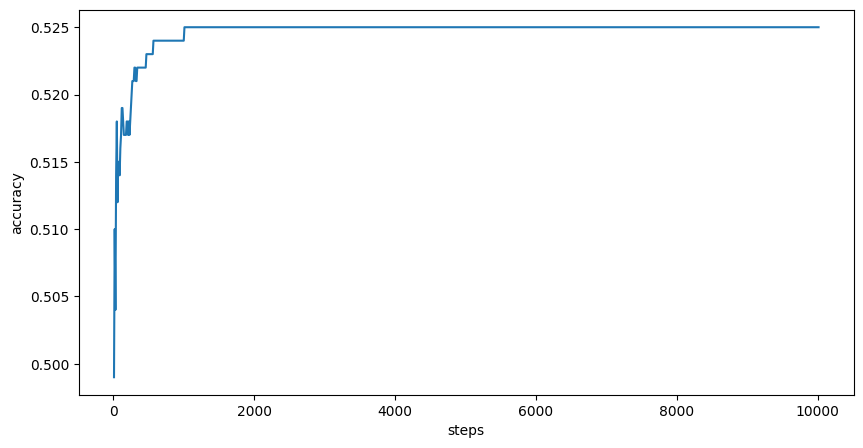

In [83]:
length = len(predict_error)
plt.figure(figsize=(10,5))
plt.xlabel('steps')
plt.ylabel('predict error')
plt.plot(np.arange(1,length+1)*10,np.array(predict_error))
plt.figure(figsize=(10,5))
plt.xlabel('steps')
plt.ylabel('accuracy')
plt.plot(np.arange(1,length+1)*10,accuracy)

In [84]:
w

array([[-1.8279058 ],
       [ 2.06336324],
       [ 0.10600672]])

Apparently, under such circumstance the logistic regression model is **underfitting**.